# Argos Capstone Project

## **Profitability Datasets** 
> ### *"Profiability_2021"*

##### Set working directory and import libraries

In [ ]:
import os
os.getcwd()
os.chdir('/Users/brandonmorgeson/Desktop/Capstone')

In [136]:
import numpy as np 
import pandas as pd 
import openpyxl as op

### Create Dataframe from CSV

In [137]:
df2 = pd.read_csv('Profitability_2021.csv')

/Users/brandonmorgeson/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (24,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Explore Data

In [ ]:
df2.info()

In [ ]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
df2.head(10)

In [138]:
df2 = df2.rename(columns = {"Deparment/State customer": "State", "Actual accumulated closing month Company Cur": "Monthly Profit"})

In [ ]:
df2.isnull().sum()

In [139]:
df2 = df2.drop("Profit Center Zone", axis = 1)

In [ ]:
df2.describe(include = 'object')

In [ ]:
df2["Totals"].value_counts()

## Run Queries 

#### Top 5 Profiting States

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2[["State", "Monthly Profit"]].groupby(["State"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

In [156]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [157]:
product_sales = df2.groupby("Product line").sum().sort_values(by=["Monthly Profit"], ascending=False).head(8)

In [158]:
product_sales

,Monthly Profit
Product line,
GREY CEMENT,1409019129.451
MASONRY CEMENT,149319123.517
Slag Cement,79314335.318
RAW MATERIALS (CEMENT),26088284.989
WHITE CEMENT,18250357.937
Not assigned,0.000
ADDITIONAL SERVICES,-1871016.840
Others,-3226610.440


In [159]:
bin_array2 = np.linspace(start=0., stop=80., num=100)

AttributeError: 'Line2D' object has no property 'kind'

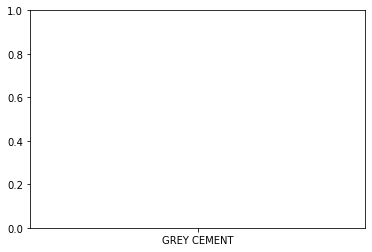

In [175]:
from matplotlib import pyplot as plt
plt.plot(product_sales, kind='bar', stacked=True, title = "Product Line", figsize=(8,8))
plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.show()

<AxesSubplot:title={'center':'Product Line'}, xlabel='Product line'>

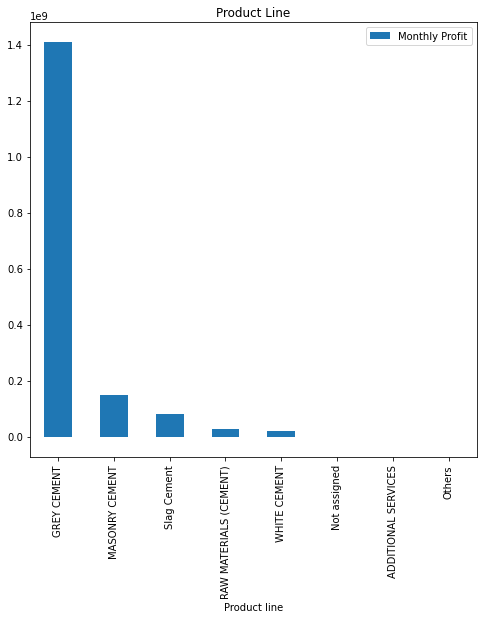

In [176]:
product_sales.plot(kind='bar', stacked=True, title = "Product Line", figsize=(8,8))

#### Top 5 Profiting Plants

In [ ]:
df2[["Source plant", "State", "Monthly Profit"]].groupby(["Source plant", "State"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top Product Packaging by Profit

In [ ]:
df2.groupby(["Product Packaging"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top Product Line by Profit

In [ ]:
df2.groupby(["Product line"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top 5 Profiting States by Material

In [ ]:
df2.groupby(["State", "Material"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

## Run Correlation Matrix

##### Source for correlation matrix
https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/

In [ ]:
# Install for first time
#pip install dython

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from dython.nominal import associations

#### Remove the extra key value columns to speed up and declutter correlation matrix

In [ ]:
df2 = df2.drop(['Source plant Key', 'Product Packaging Key', 'Plant Key',
       'Transaction Type Key', 'Sales office customer Key',
       'Deparment/State customer Key', 'Product line Key', 'Material Key',
       'Profit Center Key', 'Profit Center Zone Key', 'Ship to Key',
       'City ship to Key', 'Shipping Conditions Key',
       'Sales office ship to Key', 'Fiscal year/period Key', 'Deparment/State ship to Key', 'Presentation pack Key',
       'Product type Key', 'Incoterms Key', 'Fiscal year/period'], axis = 1)

In [ ]:
categorical_features=identify_nominal_columns(df2)

In [ ]:
#complete_correlation= associations(df2, filename= 'complete_correlation.png', figsize=(5,5))

In [ ]:
#df2_complete_corr=complete_correlation['corr']
#df2_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

### Filter customers by accounts for Revenue, Net Revenue, and EBITDA

In [ ]:
df2_revenue = df2[df2.Totals.isin(["REVENUE", "NET REVENUE", "EBITDA"])]

##### Number of rows

In [ ]:
df2_revenue.shape[0]

In [ ]:
#complete_correlation= associations(df2_revenue, filename= 'complete_correlation.png', figsize=(5,5))

In [ ]:
#df2_revenue_complete_corr=complete_correlation['corr']
#df2_revenue_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

### Highest Correlation to Profit is "Ship to" 

## Testing Clustering using Kmodes
#### *The code works, but I didn't clean or subset any data. It didn't match with profit. Might be useful later*

In [ ]:
# !pip install kmodes
# import pandas as pd
# import numpy as np
# from kmodes.kmodes import KModes
# import matplotlib.pyplot as plt
# %matplotlib inline

#df2_revenue_test = df2_revenue.dropna()

#### Best cluster was 3 or 2. This will take 10 min to run

In [ ]:
# Elbow curve to find optimal K
# cost = []
# K = range(1,5)
# for num_clusters in list(K):
#     kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
#     kmode.fit_predict(df2_revenue_test)
#     cost.append(kmode.cost_)
    
# plt.plot(K, cost, 'bx-')
# plt.xlabel('No. of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [ ]:
# Building the model with 3 clusters
# kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
# clusters = kmode.fit_predict(df2_revenue_test)
# clusters

In [ ]:
# df2_revenue_test.insert(0, "Cluster", clusters, True)
# df2_revenue_test

In [ ]:
#There was a duplicate column for some reason so had to remove
#df2_revenue_test = df2_revenue_test.iloc[:,1:]

## Stepwise regression feature selection

In [ ]:
# https://towardsdatascience.com/stepwise-regression-tutorial-in-python-ebf7c782c922

In [ ]:
## getting column names
#x_columns = ["Workweek (hours)", "GDP per capita", "Cost of Living Index", "Stability", "Rights", "Health", "Safety", "Climate", "Costs", "Popularity"]
#y = data["Monthly Nominal (USD)"]

# df2_columns = df2_revenue.columns.tolist()
# df2_columns.remove("Monthly Profit")
# y = df2_revenue["Monthly Profit"]
# x = df2_revenue[df2_columns].astype("category")

In [ ]:
# x = pd.get_dummies(x)

In [ ]:
## creating function to get model statistics
# import numpy as np
# import statsmodels.api as sm
# def get_stats():
#     results = sm.OLS(y, x).fit()
#     print(results.summary())
# get_stats()

In [ ]:
# X.info()

In [ ]:
# import pandas as pd
# import statsmodels.api as sm


# def forward_regression(X, y,
#                        threshold_in,
#                        verbose= False):
#     initial_list = []
#     included = list(initial_list)
#     while True:
#         changed=False
#         #forward step
#         excluded = list(set(X.columns)-set(included))
#         new_pval = pd.Series(index=excluded)
#         for new_column in excluded:
#             model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         best_pval = new_pval.min()
#         if best_pval < threshold_in:
#             best_feature = new_pval.idxmin()
#             included.append(best_feature)
#             changed=True
#             if verbose:
#                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

#         if not changed:
#             break

#     return included

# forward_regression(X, y,
#                   threshold_in = 1)



In [ ]:
# def backward_regression(X, y,
#                            threshold_out,
#                            verbose=False):
#     included=list(X.columns)
#     while True:
#         changed=False
#         model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
#         # use all coefs except intercept
#         pvalues = model.pvalues.iloc[1:]
#         worst_pval = pvalues.max() # null if pvalues is empty
#         if worst_pval > threshold_out:
#             changed=True
#             worst_feature = pvalues.idxmax()
#             included.remove(worst_feature)
#             if verbose:
#                 print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
#         if not changed:
#             break
#     return included

# backward_regression(X,y, 
#                     threshold_out = 0.05)

## Using Scikit

In [ ]:
# #RECURSIVE FEATURE ELIMINATION
# #Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import RFECV
# #X = X_train
# #y = Y_train
# names=pd.DataFrame(X.columns)

In [ ]:
#use linear regression as the model
# lin_reg = LinearRegression()

In [ ]:
# #This is to select 5 variables: can be changed and checked in model for accuracy
# rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
# myvalues=rfe_mod.fit(X,y) #to fit
# myvalues.support_#The mask of selected features.
# myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

In [ ]:
# rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
# rankings

In [ ]:
# #use linear regression as the model
# lin_reg = LinearRegression()

# #This is to select 8 variables: can be changed and checked in model for accuracy
# rfe_mod =  RFECV(lin_reg, step=1, cv=300) #RFE(lin_reg, 4, step=1)

# myvalues=rfe_mod.fit(X,y) #to fit

In [ ]:
# df2_columns = df2_revenue.columns.tolist()
# df2_columns.remove("Monthly Profit")
# y = df2_revenue["Monthly Profit"]
# X = df2_revenue[df2_columns].astype("category")

In [ ]:
# X = pd.get_dummies(X)

In [ ]:
# #UNIVARIATE SELECTION
# # Feature Extraction with Univariate Statistical Tests (f_regression)
# import pandas
# import numpy
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression
# from sklearn.datasets import load_digits

In [ ]:
# load data
#X = X_train
#y = Y_train
# names=pd.DataFrame(X.columns)

In [ ]:
# model = SelectKBest(score_func=f_regression, k=4)
# results = model.fit(X, y)

In [ ]:
# print (results.scores_)
#print (results.pvalues_)

In [ ]:
# results_df=pd.DataFrame(results.scores_)
# #Concat and name columns
# scored=pd.concat([names,results_df], axis=1)
# scored.columns = ["Feature", "Score"]
# scored.sort_values(by=['Score'], ascending = False).head(13)

### Queries for Revenue only customers 2021

#### Top 10 Profiting Companies

In [ ]:
df2_revenue.groupby(["Ship to"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head(10)

#### Top 5 Profiting Plants

In [ ]:
df2_revenue[["Source plant", "State", "Monthly Profit"]].groupby(["Source plant", "State"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top 10 Profiting companies with their top product and material

In [ ]:
df2_revenue.groupby(["Ship to", "Product line", "Material"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head(10)

## **Profitability 2020 Dataset**

### Map CSV 2020

In [ ]:
df3 = pd.read_csv('Profitability_2020.csv')

### Explore Data

In [ ]:
df3.info()

In [ ]:
df3.head()

In [ ]:
df3["Product line"].value_counts()

In [ ]:
print(sorted(df3.columns.values.tolist()))

In [ ]:
df3 = df3.rename(columns = {"Deparment/State customer": "State", "Actual accumulated closing month Company Cur": "Monthly Profit"})

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Run Queries for Profitability 2020

#### Top 5 Profiting States

In [ ]:
df3[["State", "Monthly Profit"]].groupby(["State"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top 5 Profiting Plants

In [ ]:
df3[["Source plant", "State", "Monthly Profit"]].groupby(["Source plant", "State"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top 5 Profiting States by Material

In [ ]:
df3.groupby(["State", "Material"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

In [ ]:
# Install for first time
#pip install dython

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

In [ ]:
categorical_features=identify_nominal_columns(df3)


In [ ]:
df3 = df3.drop(['Source plant Key', 'Product Packaging Key', 'Plant Key',
       'Transaction Type Key', 'Sales office customer Key',
       'Deparment/State customer Key', 'Product line Key', 'Material Key',
       'Profit Center Key', 'Profit Center Zone Key', 'Ship to Key',
       'City ship to Key', 'Shipping Conditions Key',
       'Sales office ship to Key', 'Fiscal year/period Key', 'Deparment/State ship to Key', 'Presentation pack Key',
       'Product type Key', 'Incoterms Key'], axis = 1)

In [ ]:
#complete_correlation= associations(df3, filename= 'complete_correlation.png', figsize=(5,5))

In [ ]:
#df3_complete_corr=complete_correlation['corr']
#df3_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

### Filter for Customers with Revenue, Net Revenue, and EBITDA

In [ ]:
df3_revenue = df3[df3.Totals.isin(["REVENUE", "NET REVENUE", "EBITDA"])]

In [ ]:
#complete_correlation= associations(df3_revenue, filename= 'complete_correlation.png', figsize=(5,5))

In [ ]:
#df3_complete_corr=complete_correlation['corr']
#df3_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

### Run Queries with new filtered dataset 2020

In [ ]:
df3_revenue.info()

#### Top 5 Profiting States

In [ ]:
df3_revenue[["State", "Monthly Profit"]].groupby(["State"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top 5 Profiting Plants

In [ ]:
df3_revenue[["Source plant", "State", "Monthly Profit"]].groupby(["Source plant", "State"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top 5 Profiting Companies with top material

In [ ]:
df3_revenue.groupby(["Ship to", "Material"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

## **Accounts Workbook**
> ### *"Account_USA"*

### Create Dataframe from CSV

In [124]:
df = pd.read_csv('Account_USA.csv')

### Explore Data

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14904 entries, 0 to 14903
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id                               14904 non-null  object 
 1   Name                             14904 non-null  object 
 2   RecordTypeId                     14904 non-null  object 
 3   ParentId                         9322 non-null   object 
 4   BillingStreet                    14886 non-null  object 
 5   BillingCity                      14890 non-null  object 
 6   BillingState                     14888 non-null  object 
 7   BillingPostalCode                14883 non-null  object 
 8   BillingCountry                   14869 non-null  object 
 9   Phone                            3031 non-null   object 
 10  Fax                              551 non-null    object 
 11  AccountNumber                    14815 non-null  object 
 12  Website           

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.describe(include = "object")

### Drop all columns with no values

In [125]:
df = df.dropna(axis = 1, how = 'all')

In [ ]:
df.info()

In [ ]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
df.head()

In [126]:
pd.concat([df["Type"], df["IsDeleted"], df["IsPersonAccount"], df["Business_Unit__c"]]).unique()

array(['Customer', False, 'Cement'], dtype=object)

#### Above columns only have 1 value. Stopped exploring after business unit 

In [127]:
df = df.drop(["IsDeleted", "Type"], axis =1)

In [ ]:
df.info()

In [ ]:
#!pip install pandoc
#import pandoc

In [ ]:
df["Segment__c"].str.strip()

In [178]:
customer_type = df["Channel__c"].value_counts()

<AxesSubplot:title={'center':'Customer Type'}>

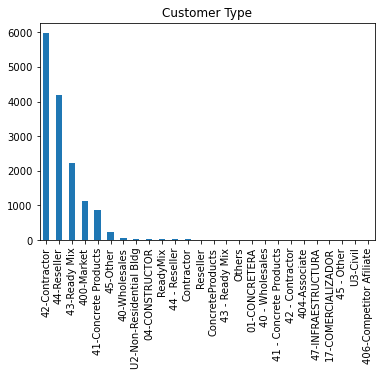

In [179]:
customer_type.plot(kind='bar', stacked=True, title = "Customer Type")

In [ ]:
df['Segment__c'].value_counts().hist(bins=80,ec='black',grid=False,color="red")

## Combing datasets

In [ ]:
df = df.rename(columns= {"AccountNumber":"Customer Key"})

In [ ]:
#Combine Profitability 2021 and Accounts
df4 =pd.merge(df2_revenue,df,on='Customer Key',how="left")

In [ ]:
#Combine all three
df4.info()

In [ ]:
df4.columns.tolist()

In [ ]:
df4 = df4.drop([ 'RecordTypeId', 'ParentId', 'BillingStreet', 'BillingPostalCode', 'BillingCountry','Phone','Fax','Website','CreatedDate',
                'CreatedById', 'LastModifiedDate', 'LastModifiedById', 'SystemModstamp', 'LastActivityDate','IsPersonAccount',
                'Cell_Phone__c', 'SAP_Code__c','SAP_Code_by_Sale_Org__c','Tax_Id__c', 'Billing_County__c','Data_Quality_Score__c',
                'Operational_Standing__c','Price_Increase_Contact__pc','Argos_ONE_RMX_Account_Admin__pc','Data_Quality_Score__pc',
                'Ownership', 'Description', 'eMail__c', 'Key_Account__c', 'No_of_Silos__c', 'No_of_Trucks__c', 'Is_RMX_Generic_Account__c',
                'Difference__c', 'Is_Generic_Account__c', 'Ship__c','Data_Quality_Description__c','Data_Quality_Description__pc', 
               "BillingState", "Status__c", "ID_Salesforce__c", "OwnerId", "Id"], axis = 1)

In [ ]:
df4.head()

## Run Queries 

#### Top Profiting Types of Buyers

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df4.groupby(["Segment__c"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head(10)

In [ ]:
#clean data
#It's not stripping the spaces for some reason
#df4["Segment__c"].str.strip()

#### Top 5 Profiting Plants

In [ ]:
df4[["Source plant", "State", "Monthly Profit"]].groupby(["Source plant", "State"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top Product Packaging by Profit

In [ ]:
df4.groupby(["Product Packaging"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top Product Line by Profit

In [ ]:
df4.groupby(["Product line"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top 5 Profiting States by Material

In [ ]:
df4.groupby(["State", "Material"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top 5 Profiting "Ship to" Companies & their Segment type

In [ ]:
df4.groupby(["Ship to", "Segment__c"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

#### Top 5 Profiting by Customer Key & their Name 

In [ ]:
df4.groupby(["Customer Key", "Name"]).sum().sort_values(by=["Monthly Profit"], ascending = False).head()

## Run Correlation Matrix

##### Source for correlation matrix
https://blog.knoldus.com/how-to-find-correlation-value-of-categorical-variables/

In [ ]:
# Install for first time
#pip install dython

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from dython.nominal import associations

In [ ]:
categorical_features=identify_nominal_columns(df4)

In [ ]:
complete_correlation= associations(df4, filename= 'complete_correlation.png', figsize=(2,2))

In [ ]:
df4_complete_corr=complete_correlation['corr']
df4_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)